In [2]:
import pandas as pd
import seaborn as sns


data = pd.read_csv('CaseCompetitionData.csv', sep=',')
print(data.dtypes)
data.loc[data['customer_income'] == '?'].head()

insert_num                      int64
purchase_make                  object
purchase_model                 object
purchase_vehicle_year           int64
purchase_price                 object
trade_in                        int64
vehicle_financing               int64
customer_age                   object
customer_income                object
customer_gender                object
customer_previous_purchase      int64
customer_distance_to_dealer    object
post_purchase_satisfaction     object
vehicle_warranty_used           int64
subsequent_purchases            int64
dtype: object


,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases
3,360305,VOLVO,S40,2008,15001 - 20000,1,0,41 - 50,?,M,0,4,?,0,1
13,242460,MERCEDES-BENZ,CLK320,2005,15001 - 20000,0,0,41 - 50,?,F,1,6,?,1,0
17,109525,FORD,EXPLORER,2013,30001 - 35000,0,0,41 - 50,?,F,0,11,?,0,0
24,340117,TOYOTA,SIENNA,2011,20001 - 25000,0,0,41 - 50,?,M,0,13,?,0,0
28,58484,CHEVROLET,SILVERADO 2500,2005,20001 - 25000,1,0,71 - 80,?,M,0,140,?,0,0


In [6]:
print(data.isna().sum()) # checks to see if there are any null records
print(data['subsequent_purchases'].unique()) # used this to check variable types in the rows => found '?'in 4
print(len(data)) # len of data set
# checking out missing data with conditionals
print(len(data.loc[(data['purchase_price'] !='?') & (data['customer_income'] != '?') & (data['customer_distance_to_dealer'] != '?')])) 
print(len(data.loc[data['post_purchase_satisfaction'] == '?'])) #satisfaction survey is a small group of non null
print(len(data.loc[data['customer_income'] == '?']))
print(len(data.loc[data['customer_distance_to_dealer'] == '?']))
print(len(data.loc[data['purchase_price'] == '?']))

insert_num                     0
purchase_make                  0
purchase_model                 0
purchase_vehicle_year          0
purchase_price                 0
trade_in                       0
vehicle_financing              0
customer_age                   0
customer_income                0
customer_gender                0
customer_previous_purchase     0
customer_distance_to_dealer    0
post_purchase_satisfaction     0
vehicle_warranty_used          0
subsequent_purchases           0
dtype: int64
[ 0  9  1  2  4  3  7  8  5 10  6]
361559
307870
360340
49091
6162
3


   subsequent_purchases  insert_num
0                     0      238004
1                     1       98861
2                     2       10363
3                     3        3855
4                     4        3173
AxesSubplot(0.125,0.125;0.775x0.755)
   percent_total  subsequent_purchases
0      65.827154                     0
1      27.342979                     1
2       2.866199                     2
3       1.066216                     3
4       0.877588                     4
5       0.563394                     5
6       0.296494                     6
7       0.300919                     7
8       0.284877                     8
9       0.302302                     9


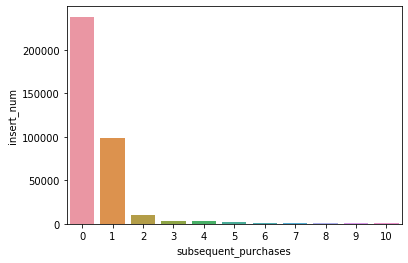

In [4]:
# reset index lets you create new data frame keeping the column names
sub_pur = data.groupby('subsequent_purchases')['insert_num'].count().to_frame().reset_index()  
print(sub_pur.head())
ax = sns.barplot(x='subsequent_purchases', y='insert_num', data=sub_pur) # seeing subsequent purchase distribution
print(ax)
total = len(data['insert_num'])
sub_pur['percent_total'] = sub_pur['insert_num']/total*100
print(sub_pur[['percent_total', 'subsequent_purchases']].head(10)) # looking at it in tabel format
# this also shows us that we are looking at a moderately unbalanced problem with roughly 34% being true positives

In [5]:
data['customer_previous_purchase'].mean()


0.21135692929784627

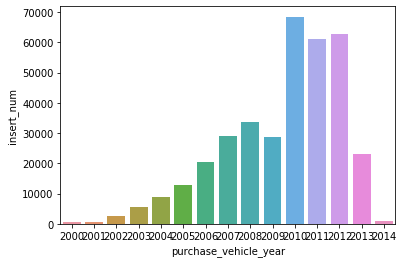

In [3]:
#sns.violinplot(x=data['purchase_vehicle_year']) # simple check of what year people are buying cars (remember its 2013)
year_parsed = data[data['purchase_vehicle_year'] >= 2000] # parsing to get a closer look at distribution
year_parsed = year_parsed.groupby('purchase_vehicle_year')['insert_num'].count().to_frame().reset_index()
sns.barplot(x='purchase_vehicle_year', y='insert_num', data=year_parsed)
#2010-2012 hold vast majority of purchases

year_parsed.to_csv('purchase_year_distribution.csv')

In [5]:
distance_dist = data.groupby('customer_distance_to_dealer')['insert_num'].count().to_frame().reset_index()
distance_dist.to_csv('distance_dist.csv')

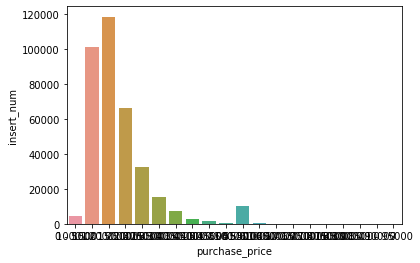

In [4]:
price_count = data.groupby('purchase_price')['insert_num'].count().to_frame().reset_index()
sns.barplot(x='purchase_price', y='insert_num', data=price_count)
price_count
#most cars in 10,000 - 35,000 range, makes sense
price_count.to_csv('purchase_price_distribution.csv')

In [7]:
income_dist = data.groupby('customer_income')['insert_num'].count().to_frame().reset_index()
income_dist.to_csv('income_dist.csv')

In [11]:
data.groupby('trade_in')['insert_num'].count().to_frame().to_csv('trade_dist.csv')
data.groupby('vehicle_warranty_used')['insert_num'].count().to_frame().to_csv('warranty_dist.csv')
data.groupby('customer_previous_purchase')['insert_num'].count().to_frame().to_csv('prev_dist.csv')
data.groupby('vehicle_financing')['insert_num'].count().to_frame().to_csv('fin_dist.csv')

In [9]:
data['actual'] = 1
data.loc[data['subsequent_purchases'] == 0, 'actual'] = 0

,purchase_vehicle_year,insert_num
0,2000,225
1,2001,252
2,2002,1382
3,2003,3518
4,2004,5637
5,2005,8306
6,2006,13387
7,2007,19204
8,2008,22247
9,2009,19091


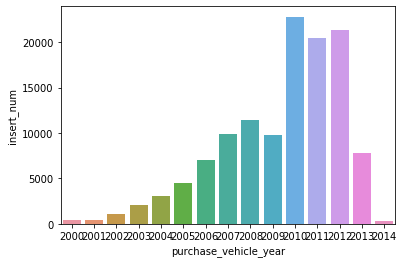

In [10]:
trade_in_yes = data.loc[(data['actual'] == 1) & (data['purchase_vehicle_year'] >= 2000)].groupby('purchase_vehicle_year')['insert_num'].count().to_frame().reset_index()
trade_in_no = data.loc[(data['actual'] == 0) & (data['purchase_vehicle_year'] >= 2000)].groupby('purchase_vehicle_year')['insert_num'].count().to_frame().reset_index()
sns.barplot(x='purchase_vehicle_year', y='insert_num', data=trade_in_yes)
trade_in_yes
trade_in_no
# 

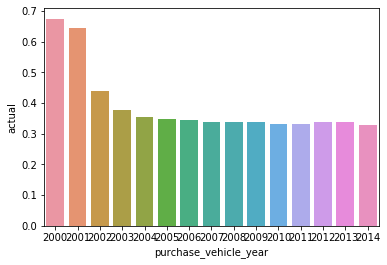

In [11]:
#sns.barplot(x='purchase_vehicle_year', y='insert_num', data=trade_in_no)
trade_in_ratio = data.loc[data['purchase_vehicle_year'] >= 2000].groupby('purchase_vehicle_year')['actual'].mean().to_frame().reset_index()
sns.barplot(x='purchase_vehicle_year', y='actual', data=trade_in_ratio)

# while newer trade ins (2010 - 2012) make up the bulk of repeat customers (like most other categories) older cars have 
# the higher ratio of repeat buyers

,post_purchase_satisfaction,actual
0,0,12
1,1,1
2,10,819
3,3,5
4,4,6
5,5,12
6,6,13
7,7,34
8,8,94
9,9,223


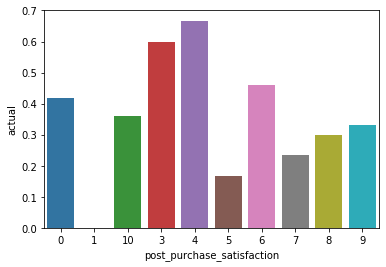

In [12]:
data_1 = data.loc[data['post_purchase_satisfaction'] != '?'].groupby('post_purchase_satisfaction')['actual'].count().to_frame().reset_index()

data_2 = data.loc[data['post_purchase_satisfaction'] != '?'].groupby('post_purchase_satisfaction')['actual'].mean().to_frame().reset_index()

sns.barplot(x='post_purchase_satisfaction', y='actual', data=data_2)
data_1.head(10)